<a href="https://colab.research.google.com/github/sid-juyal/ML_Project-Banking/blob/master/Marketing_Campaign_for_Banking_Products_SJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Internship: Machine Learning Project**

Title: **Marketing Campaign for Banking Products**

Submitted by: Siddharth Juyal (siddharth.amity9b@gmail.com)
________________________________________________________________________________




**Context:**

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

**Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

**Import Libraries and Dataset:**

First we will import all the required Python Libraries-

In [10]:
import pandas as pd                                                    # Pandas: For reading the CSV Dataset file, creating DataFrames and performing analysis
import numpy as np                                                     # NumPy: For suitable array operations in an easier way
import matplotlib.pyplot as plt                                        # Matplotlib: For plotting the graphs
import seaborn as sns                                                  # Seaborn: For the purpose of visualization of data using various plots
%matplotlib inline
sns.set(style="ticks")
import io
from scipy.stats import zscore                                         # SciKit learn: The Python library for scientific ML techniques
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from  sklearn.utils import resample
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn import *
from sklearn import model_selection
pd.options.mode.chained_assignment = None

**Uploading Dataset and reading data from CSV file:-**

**Data Description:**

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [3]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [ ]:
# Let's see if we have correctly imported the data
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

##  Data Summary:

Now we will check our data's brief information, datatypes in our columns and all other summary.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


As we can see, we have a total of 5000 rows in our Dataset, all without any null value.

In [ ]:
data.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
data.shape

(5000, 14)

In [ ]:
data.index

RangeIndex(start=0, stop=5000, step=1)

In [ ]:
# No columns have null data in the file
data[data.isnull()].count()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [6]:
data.skew(numeric_only=True)

ID                    0.000000
Age                  -0.029341
Experience           -0.026325
Income                0.841339
ZIPCode             -12.500221
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
PersonalLoan          2.743607
SecuritiesAccount     2.588268
CDAccount             3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64


As we can observe; Age, Experience,Income, Family, Education are approximately symmetric. However, CCAvg, Mortage, Personal Loan, Securities account,CD account are highly skewed.

In [ ]:
data[data<0].count()

ID                    0
Age                   0
Experience           52
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
SecuritiesAccount     0
CDAccount             0
Online                0
CreditCard            0
dtype: int64

Like we had observed earlier, no null values.

In [ ]:
# There are 52 records with negative experience. Before proceeding any further we need to clean the same
data[data['Experience'] < 0]['Experience'].count()

52


**Data Cleaning:**

Now we will move on to the next step of cleaning the data by checking for any missing or infeasible data. This will make the Dataset make suitable for applying Machine Learning algorithms.

As we can observe from our last cell results, some of the values are negative, which should not be there since the range of the variable 'Experience' is [0, inf].
(We will set the negative values to the median of the remaining values in that column. The reason for choosing Median and not Mean is that Mean is sensitive to outliers in the Dataset while the Median is not.)

In [ ]:
#Cleaning the negative variables.
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # Getting the customer ID who has negative experience.

In [ ]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [ ]:
# Checking if there are still records with negative experiences.
data[data['Experience'] < 0]['Experience'].count()

0

Again seeing the summary after data cleaning.

In [ ]:
# Eye balling the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Exploratory Data Analysis (EDA):**

Let us visualize the given Dataset using Seaborn library plots so that we can get some idea of the various patterns, if any. Let's first go sequentially with the tasks assigned as per the project document.

In [ ]:
# Finding unique data from the given dataset.
data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

Taking a deeper dive into the nature of Features or Variables-

1) ID: We have already set this as our Index column. Can be safely omitted from EDA.

2) Age: The Customer's age is a Numerical data of type Interval.

3) Income: Annual Income of customers is a Numerical data of type Ordinal. One of the key feature for our Model prediction.

4) ZIP Code: Home address of the Customers. Need not be considered in EDA.

5) Family: Family size of the customer. Need not be considered in EDA.

6) CC Avg.: Credit cards spending per month. This is a Numerical data type which will give us an idea overall economic level of a Customer.

7) Education: This is a Nominal categorical data type.

8) Mortgage: This Numerical data type gives the value of House mortgage.

9) Personal Load: This is our feature to be predicted. The data in the column is categorical and nominal.

10) Securities Account: This Nominal Categorical data type indicates if the Customer has an account in the bank.

11) CD Account: This is one of our Categorical data columns.

12) Online: This Nominal Categorical data type tells if the Customer has an Online Account.

13) Credit Card: This Nominal Categotical data value tells about possession of Credit card by the Customer.

With this, we can broadly divide our Dataset into

A) Numerical: ['age', 'experience', 'income', 'zip code', 'family', 'ccavg', education', 'mortgage']

B) Categorical: ['personal loan', 'securities account', 'cd account', 'online', 'creditcard']

In [ ]:
# Finding the number of people with zero Mortgage value.
data[data['Mortgage'] == 0]['Mortgage'].count()

3462

In [ ]:
# Finding the number of people with zero Credit card spending per month.
data[data['CCAvg'] == 0]['CCAvg'].count()

106

Now the task is to find the value counts of our Categorical columns:-

In [ ]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
data['PersonalLoan'].value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

In [ ]:
data['SecuritiesAccount'].value_counts()

0    4478
1     522
Name: SecuritiesAccount, dtype: int64

In [ ]:
data['CDAccount'].value_counts()

0    4698
1     302
Name: CDAccount, dtype: int64

In [ ]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64


Now that we have found out the counts of these categorical columns, let's see how many customers who bought the Personal loan use other services provided by the bank.

In [ ]:
data_ser = data[['PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']]
data_serg= data_ser.groupby('PersonalLoan').sum()
data_serg

,SecuritiesAccount,CDAccount,Online,CreditCard
PersonalLoan,,,,
0,462,162,2693,1327
1,60,140,291,143


In [ ]:
data_serg.describe().T

,count,mean,std,min,25%,50%,75%,max
SecuritiesAccount,2.0,261.0,284.256926,60.0,160.5,261.0,361.5,462.0
CDAccount,2.0,151.0,15.556349,140.0,145.5,151.0,156.5,162.0
Online,2.0,1492.0,1698.470488,291.0,891.5,1492.0,2092.5,2693.0
CreditCard,2.0,735.0,837.214429,143.0,439.0,735.0,1031.0,1327.0


Now we will do Univariate Analysis using different plots:-

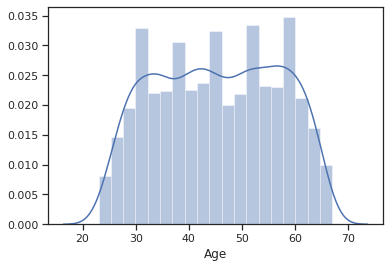

In [ ]:
sns.distplot(data['Age'], kde=True)

Observation: We can see a Multi-modal distribution of the 'Age' variable.

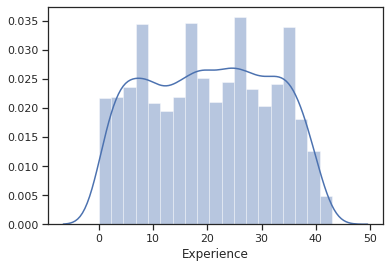

In [ ]:
sns.distplot(data['Experience'])


Observation: Again, we can see a Multi-modal and uniform distribution of the 'Experience' variable

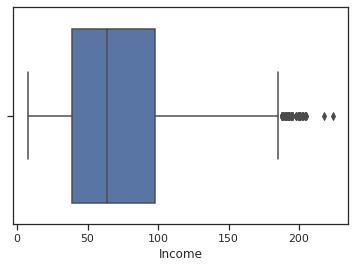

In [ ]:
sns.boxplot(data['Income'])

Observation: We can observe the Median 'Income' to be around $60,000 and there are a lot ou Outliers as well.

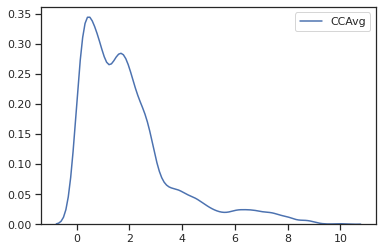

In [ ]:
sns.kdeplot(data['CCAvg'])

Observation: A large number of customers spend between $1000-3000 with their Credit cards.

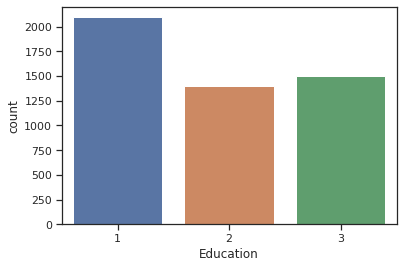

In [7]:
sns.countplot(data['Education']);


Observation: The proportion of education level of our customers is: Undergraduates > Professionals > Graduate

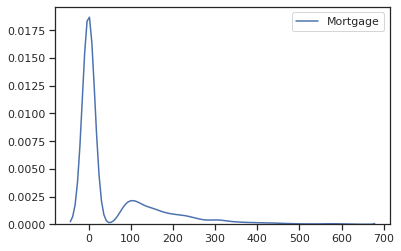

In [ ]:
sns.kdeplot(data['Mortgage'])

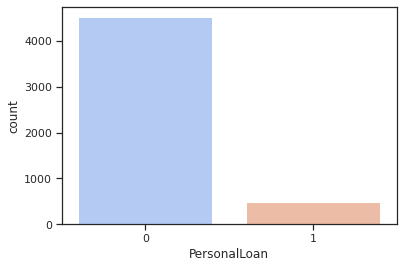

In [ ]:
sns.countplot(data['PersonalLoan'], palette='coolwarm')

Observation: A very less portion of Customers accepted a Personal loan in the previous campaign.

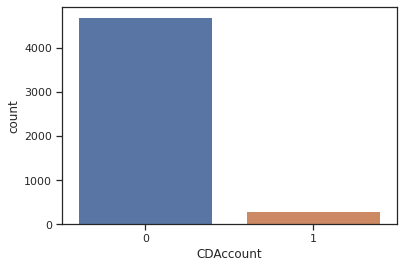

In [ ]:
sns.countplot(data['CDAccount'])

Observation: Customers who buy Personal loans do not own a CD Account; can be one of the conclusions but we may not affirm to it yet.

Now we will do Bivariate Analysis using different plots:-

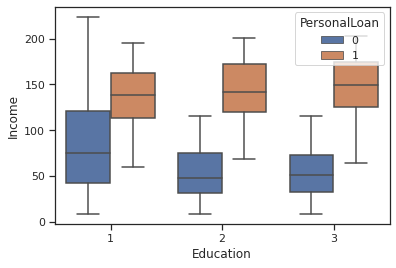

In [ ]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

**Observation** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels.

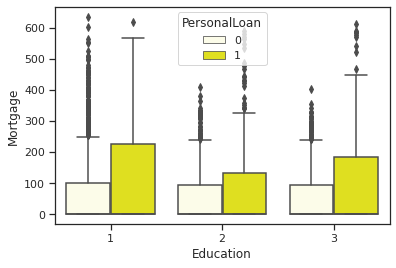

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data,color='yellow')

**Observations** : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

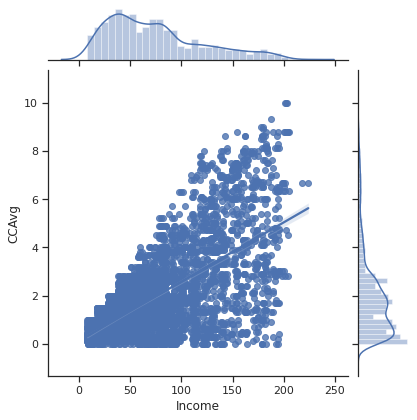

In [8]:
sns.jointplot(x='Income',y='CCAvg',data=data,kind='reg');

Observation: As intuitive, Credit Card spending is increasing with teh Income level.

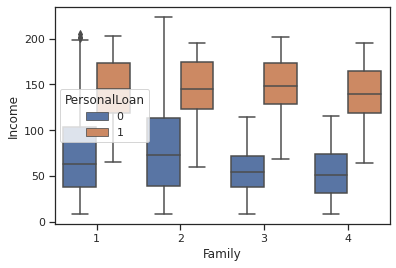

In [ ]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with 
# high income

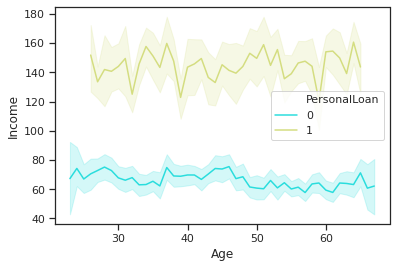

In [ ]:
sns.lineplot(x="Age", y="Income", hue='PersonalLoan', data=data,palette='rainbow');

Observation: We can see that the Customers who accepted the Personal Loan have a relatively higher income than who did not accept it.

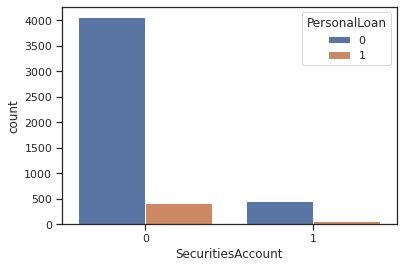

In [ ]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")


**Observation** : Majority of customers who does not have loan have securities account

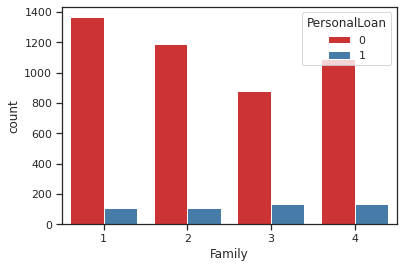

In [ ]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1')

Now since there is large variations in this so lets go deep and analyse this in more detailed manner:-

In [ ]:
familysize_no = np.mean( data[data.PersonalLoan == 0]['Family'] )
familysize_no


2.3734513274336284

In [ ]:
familysize_yes = np.mean( data[data.PersonalLoan == 1]['Family'] )
familysize_yes

2.6125

In [ ]:
from scipy import stats

stats.ttest_ind(data[data.PersonalLoan == 1]['Family'], data[data.PersonalLoan == 1]['Family'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

### **Observation**
Family size seems to have no impact on decision to take a loan.

But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.



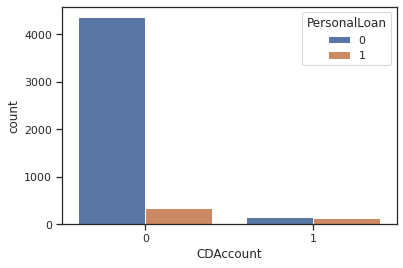

In [ ]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')

**Observation**: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

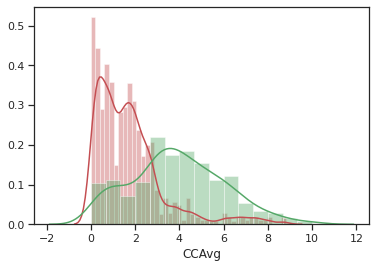

In [ ]:
sns.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'g')


Observation: We can see that Customers accepting a Personal loan have higher Credit card spending.

In [ ]:
print('Credit card spending of Non-Loan customers: ',data[data.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data.PersonalLoan == 1]['CCAvg'].median()*1000)

**Observation**: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

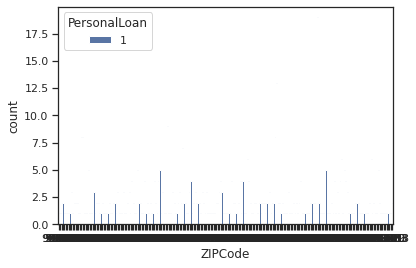

In [ ]:
sns.countplot(x="ZIPCode", data=data[data.PersonalLoan==1], hue ="PersonalLoan",orient ='v')

In [ ]:
zipcode_top5 = data[data.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

Text(0, 0.5, 'Age')

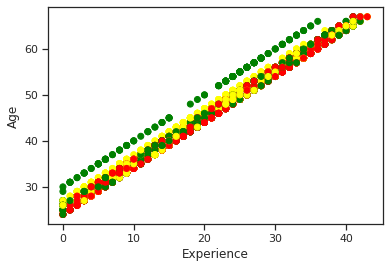

In [ ]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

**Observation**: The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

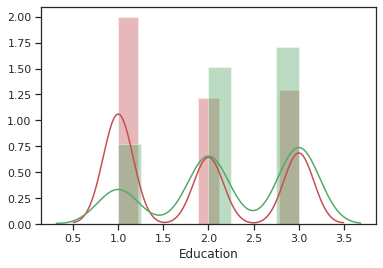

In [ ]:
sns.distplot( data[data.PersonalLoan == 0]['Education'], color = 'r')
sns.distplot( data[data.PersonalLoan == 1]['Education'], color = 'g')

And lastly, lets try our hands on Multivariate Analysis:-

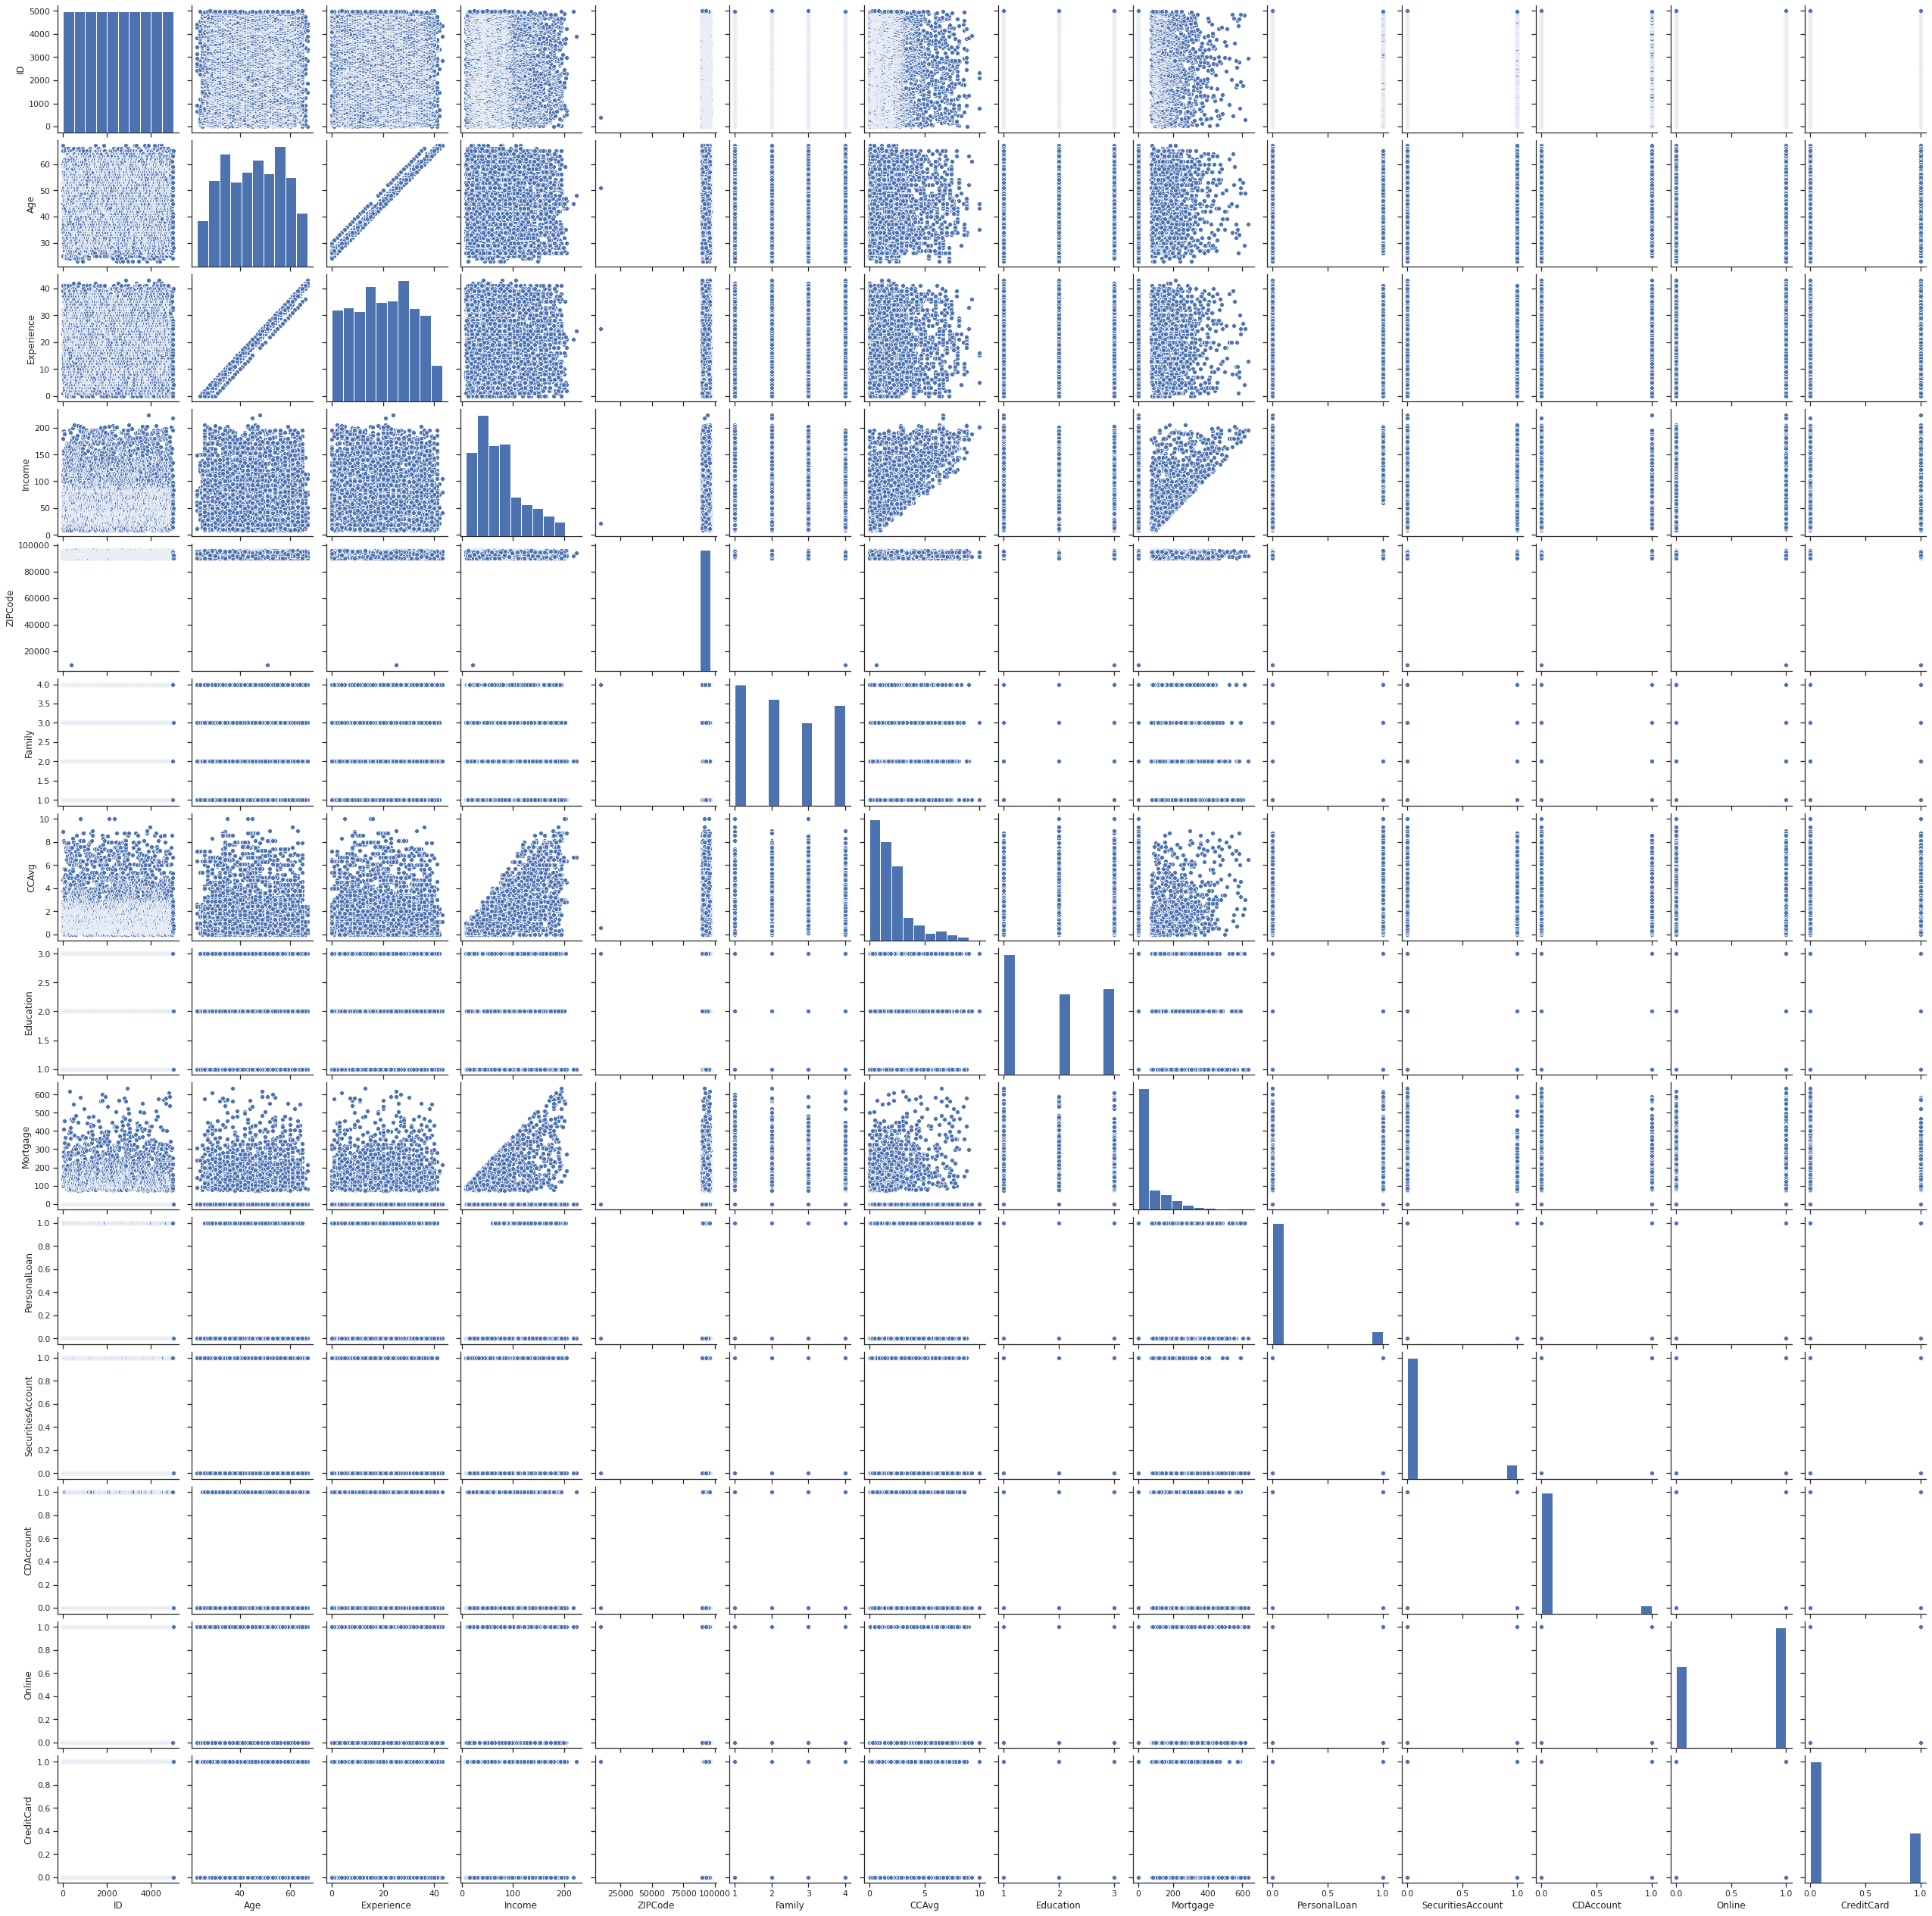

In [ ]:
# Finaly let us draw a pairplot to get a broader perspective
sns.pairplot(data, palette='OrRd')

Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median.

Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.

CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.

Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.

The variables family and education are ordinal variables. The distribution of families is evenly distributed.

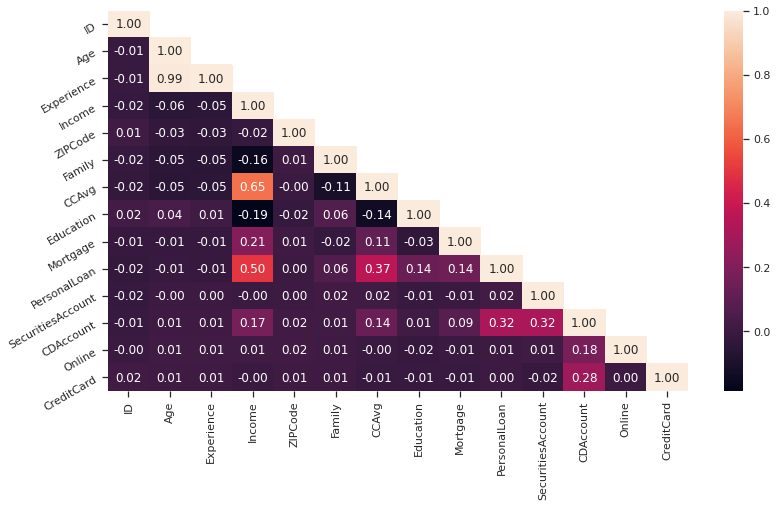

In [ ]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

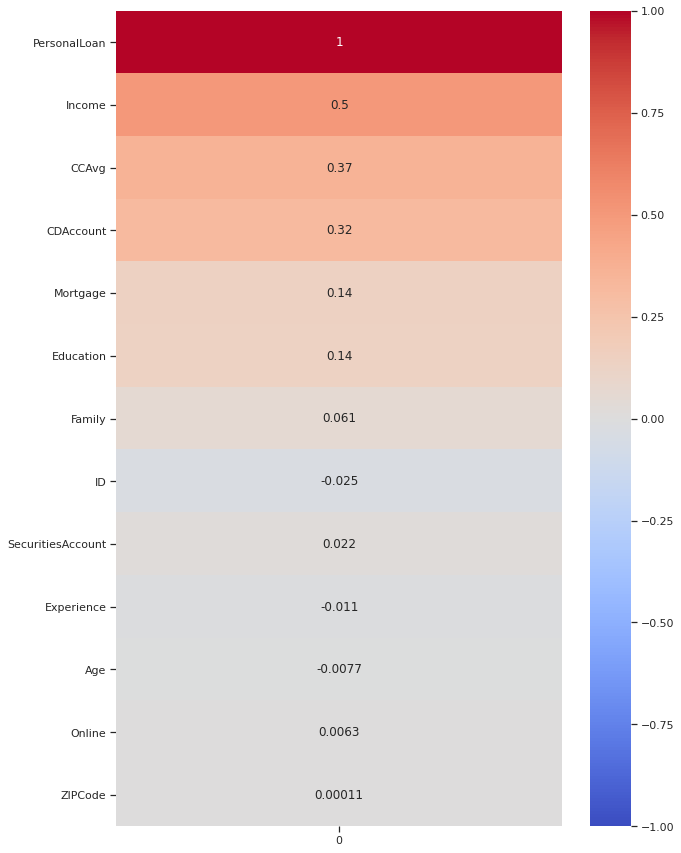

In [ ]:
#Correlation between all of the numeric variables in the data frame and the target-personal_loan
#Pandas’ corrwith() method return a pair-wise correlation
correlations = data.corrwith(data['PersonalLoan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

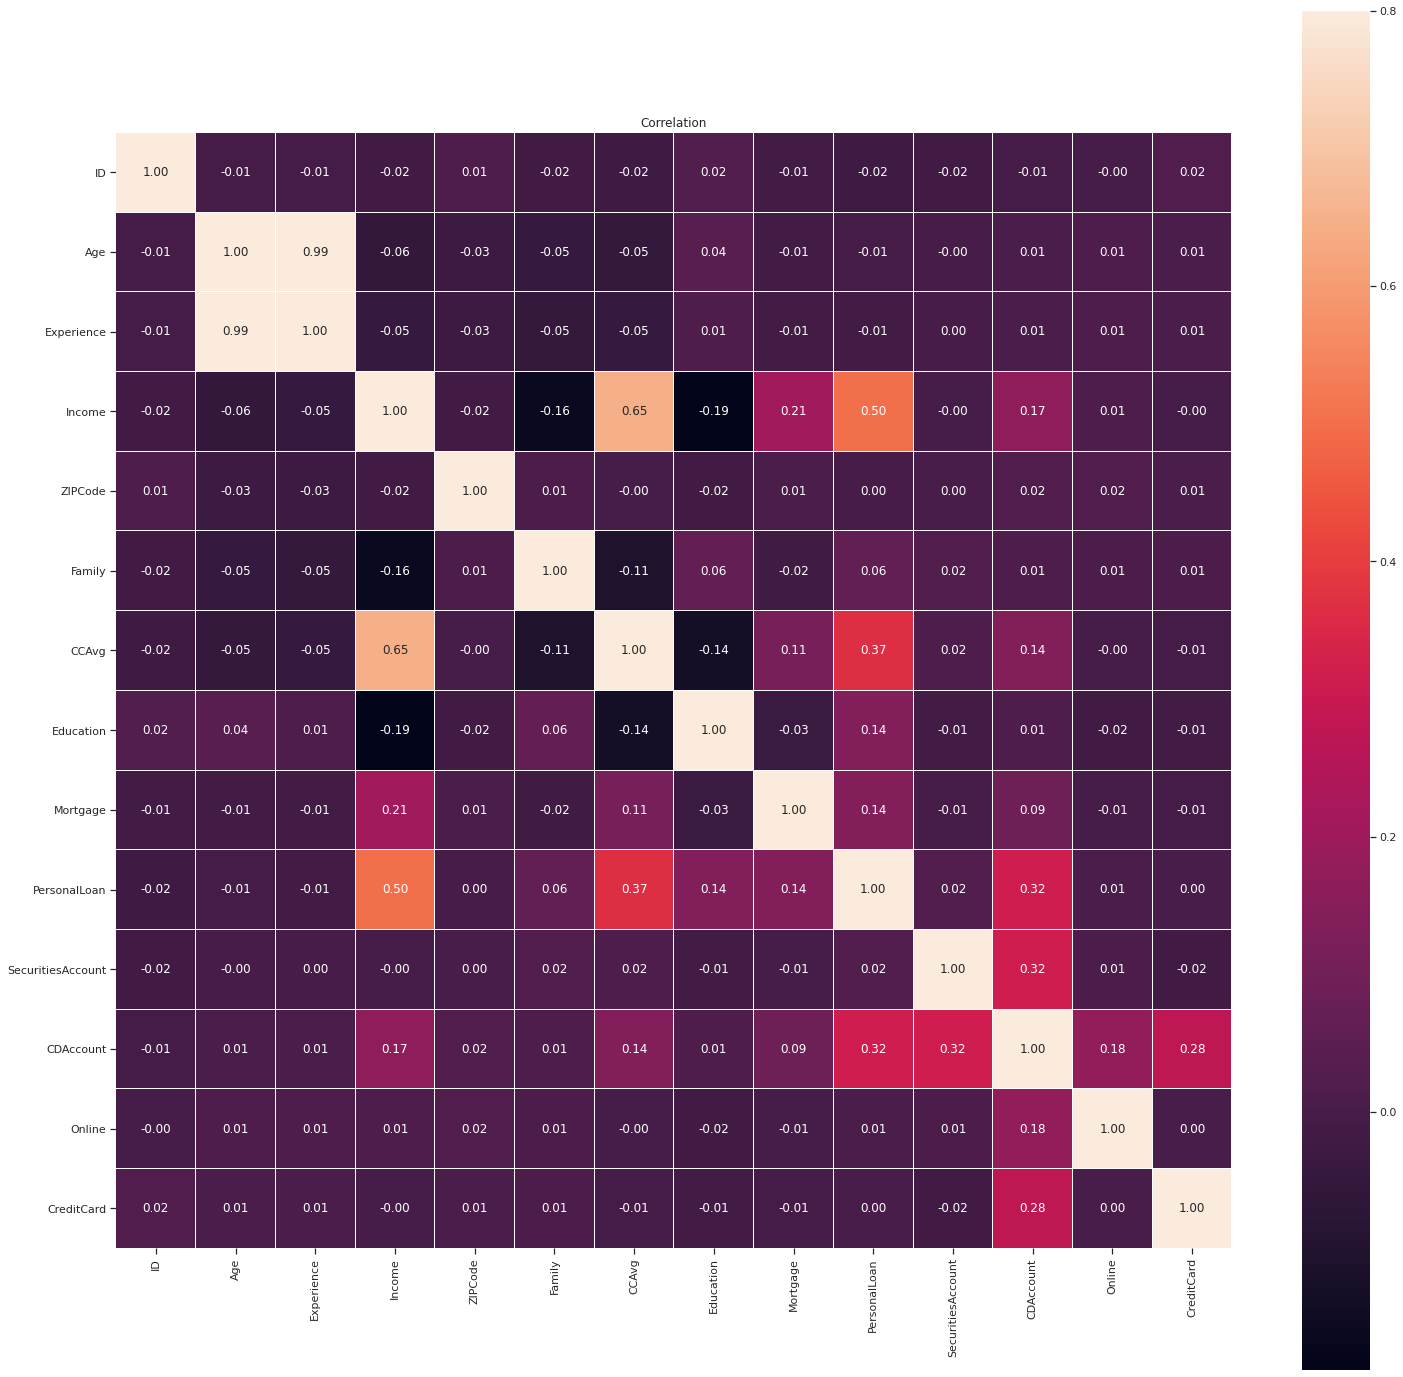

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

**Observation**




*   Age and Experience is highly correlated.
*   Income and CCAvg is also correlated to a large extent.












**Feature Inspection and Transformation along with Splitting Data into Training and Test Set:**

This is a very important part in which we will have a close check at the distribution of all the features in our Dataset. A balanced Dataset is essential for unbiased predictions from our model.

In [ ]:
# As we can see from our last plot in the Univariate Analysis, we have 2 classes in the 'Personal Loan' Feature. However, their ratio is approximately 1:10 which indicates that our Dataset is imbalanced.
data['PersonalLoan'].value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

Now, there is an important thing to note. As you could see, our Target variable is not equally distributed, only around 10% of customers have accepted the Personal Loan. So, if our model is going to learn from this dataset and do the prediction chances are there that it might be biased towards the Majority class (In this case , Personal loan not being accepted by the customer) and ignore the minority class. Hence , we should try to balance our dataset to make our model learn and predict with being biased and treat both classes equally for better result. A balanced Dataset is essential for unbiased predictions from our model. We need to come up with a solution to ensure that our model does not make any biased decisions.

There are a couple of ways to achieve this and this technique is called Resampling.

For this problem, we will try Upsampling since we wish to have a greater number of customers having accepted the loan.

In [11]:
df_maj = data[data['PersonalLoan']==0]
df_min = data[data['PersonalLoan']==1]
df_upsample_min = resample(df_min, replace=True, random_state=12, n_samples=4520)
df_upsample = pd.concat([df_maj, df_upsample_min])

Let's check the distribution after performing the Upsampling.

In [12]:
df_upsample['PersonalLoan'].value_counts()

1    4520
0    4520
Name: PersonalLoan, dtype: int64

**Splitting Data Set**

We will divide our Dataset into a Training data and a Test data set, in the ratio of 70:30. The stratify parameter of train_test_split function will be used to get the same class distribution across our train and the test data set.

In [ ]:
# Let's first separate out our output column 'personal loan'

data_X = data.loc[:, data.columns != "PersonalLoan"]
data_Y = data[["PersonalLoan"]]

In [ ]:
X_train, X_test ,y_train, y_test = train_test_split(data_X, data_Y, test_size=0.30, stratify=data_Y, random_state=0)
X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);


**Splitting the upsampled data**

In [14]:
# Let's first separate out our output column 'PersonalLoan' from df_upsampled
X_upsampled = df_upsample.drop(['PersonalLoan'],axis=1)
Y_upsampled = df_upsample['PersonalLoan']


In [15]:
X_upsampled_train, X_upsampled_test, Y_upsampled_train, Y_upsampled_test = train_test_split(X_upsampled, Y_upsampled, test_size=0.3, stratify=Y_upsampled, random_state=0)
X_upsampled_train.reset_index(drop=True, inplace=True);
X_upsampled_test.reset_index(drop=True, inplace=True);
Y_upsampled_train.reset_index(drop=True, inplace=True);
X_upsampled_test.reset_index(drop=True, inplace=True);



**Feature Inspection and Transformation**

Now, let's check each of our Numerical & Ordinal Categorical features in X_train set for Skewness and Outliers. Outliers affect the learning performance thus it is very essential to perform Outlier analysis for each feature, one-by-one. For each feature, we will check two plot, Normalized histogram using distplot() to check Skewness and Boxplot to check for Outliers.Then, for Skewed data, we will apply suitable Transformation to remove the Outliers and reduce the Skewness. Outliers Analysis is not required for other Nominal or Binary Categorical features.



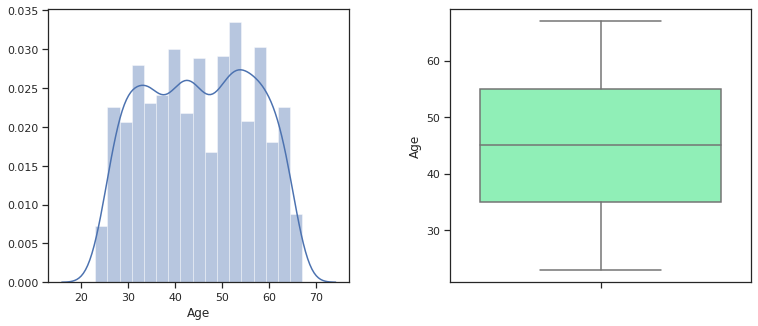

In [ ]:
# Feature 1: 'Age' is our Numerical interval data.

fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.distplot(X_train["Age"], ax=axes[0]);
sns.boxplot(X_train["Age"], orient="vertical", ax=axes[1], palette = 'rainbow')

fig.tight_layout(pad=5.0)

It can be easily observed that there are no Outliers for the 'Age' feature.

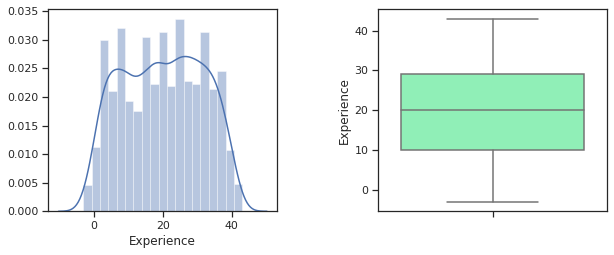

In [ ]:
# Feature 2: 'Experience' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Experience"], ax=axes[0]);
sns.boxplot(X_train["Experience"], orient="vertical", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

It can be easily observed that there are no Outliers for the 'Experience' feature.

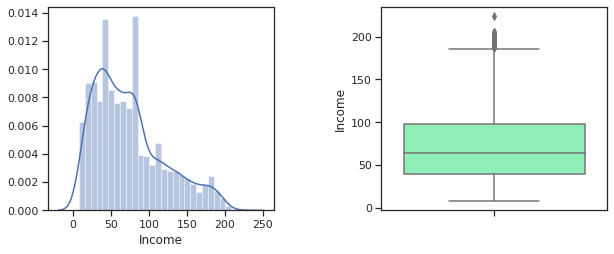

In [ ]:
# Feature 3: 'Income' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Income"], ax=axes[0]);
sns.boxplot(X_train["Income"], orient="v", palette="rainbow", ax=axes[1]);

fig.tight_layout(pad=5.0)


Now, as we have a highly skewed Distribution of Income feature. It can be classified as a log-normal distribution which means if we apply log transformation to Income, resulting distribution will be similar to a Gaussian. We will use Yeo-Johnson method from scikit-learn, PowerTransformer. The resulting distribution is as shown below:

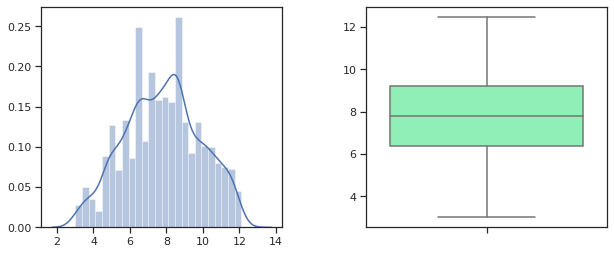

In [ ]:
pt_income = PowerTransformer(method="yeo-johnson", standardize=False)

pt_income.fit(X_train["Income"].values.reshape(-1, 1))

pti = pt_income.transform(X_train["Income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(pti, ax=axes[0]);
sns.boxplot(pti, orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

Now, the Distribution of 'Income' feature is no longer skewed and there are no Outliers as well.

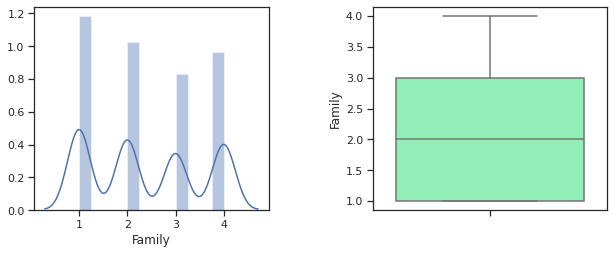

In [ ]:
# Feature 4: 'Family' is our Ordinal Categorical data.
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Family"], ax=axes[0]);
sns.boxplot(X_train["Family"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

It can be easily observed that there are no Outliers for the 'Family' feature.

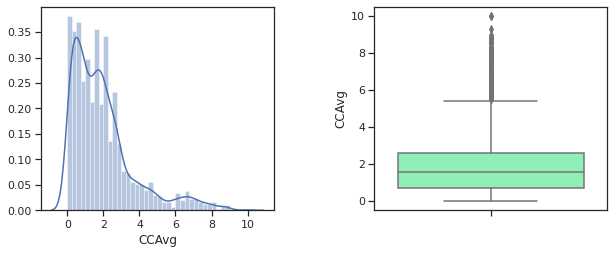

In [ ]:
# Feature 5: 'CC Avg' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["CCAvg"], ax=axes[0]);
sns.boxplot(X_train["CCAvg"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

Now, similar to 'Income' feature, we again have a right skewed Distribution of CC Avg feature which has a log-normal distribution. We will use the same Yeo-Johnson method from scikit-learn, PowerTransformer to apply log transformation to Income, resulting distribution will be similar to a Gaussian. The resulting distribution is as shown below:

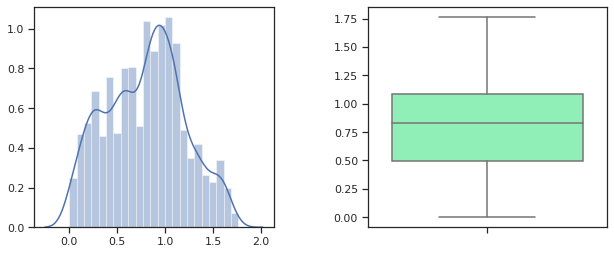

In [ ]:
pt_ccavg = PowerTransformer(method="yeo-johnson", standardize=False)

pt_ccavg.fit(X_train["CCAvg"].values.reshape(-1, 1))

ptc = pt_ccavg.transform(X_train["CCAvg"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(ptc, ax=axes[0]);
sns.boxplot(ptc, orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

Now, the Distribution of 'CC Average' feature is no longer skewed and there are no Outliers as well.

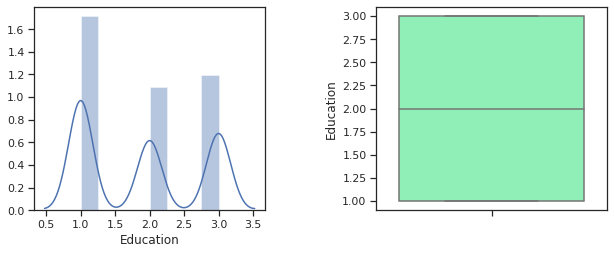

In [ ]:
# Feature 6: 'Education' is our Ordinal Categorical data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Education"], ax=axes[0]);
sns.boxplot(X_train["Education"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

It can be easily observed that there are no Outliers for the 'Education' feature.

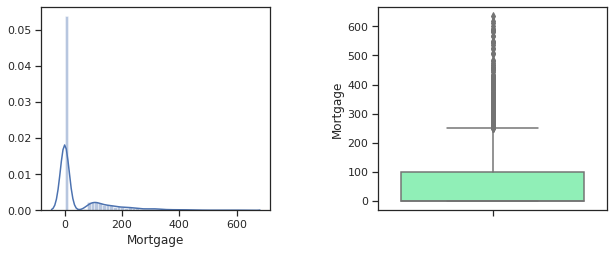

In [ ]:
# Feature 7: 'Mortgage' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["Mortgage"], ax=axes[0]);
sns.boxplot(X_train["Mortgage"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

As we can see, the Distribution of 'Mortgage' feature is highly skewed and there are a lot of Outliers as well. We can construct an ordinal categorical feature int_mortgage using Mortgage feature and then drop Mortgage feature. Same procedure will be applied to test_X as well.

In [ ]:
X_train["int_mortgage"] = pd.cut(X_train["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_train.drop("Mortgage", axis=1, inplace=True)

X_test["int_mortgage"] = pd.cut(X_test["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_test.drop("Mortgage", axis=1, inplace=True)

The remaining features are Binary Categorical. Thus, no Outlier Analysis is required.

Now let's perform 'Standardization' on our Dataset to increase our learning performance. StandardScaler of scikit-learn will be used. A StandardScaler is fit to the feature in X_train, then this scaler transforms the same features in X_train and X_test. This process is repeated for all features.

In [ ]:
for ind, column in enumerate(X_train.columns):
    scaler = StandardScaler()

    # fit to the training data
    scaler.fit(X_train[[column]])

    # transform the training data
    np_array = scaler.transform(X_train[[column]])
    X_train.loc[:, column] = pd.Series(np_array.flatten())

    # transform the test data
    np_array = scaler.transform(X_test[[column]])
    X_test.loc[:, column] = pd.Series(np_array.flatten())

Now, we inspect the linear correlations between features and also between features and their output. Pandas corr function is used to compute correlation matrix and Seaborn heatmap is used for plotting. The semicolon at the end of seaborn command is used to suppress the output other than the plot. Correlation is in the interval [-1,1], and so our colorbar is.

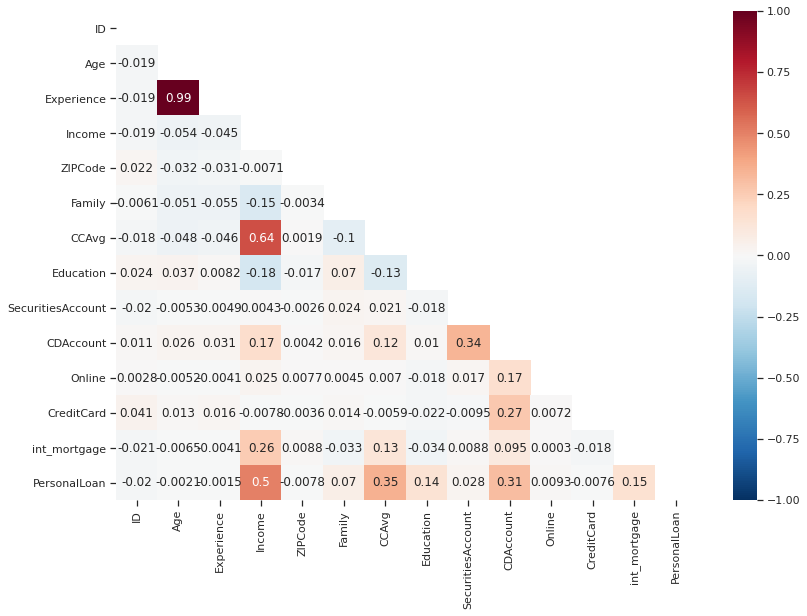

In [ ]:
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(13,9))
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0, mask=mask,cmap="RdBu_r");


Age and Experience features have very high correlation, 0.99. It is also intuitively understandable that experience increases as age increases. Correlated features degrade the learning performance and causes instability on the models. We drop Experience feature from both train_X and test_X.

In [ ]:
X_train.drop("Experience", axis=1, inplace=True)
X_test.drop("Experience", axis=1, inplace=True)

 **Applying ML Algorithms (Model Training & Prediction)**

Now comes the stage of our actual Model bulding. 

Our idea is simple- We will apply 5 Classifier Models viz. 'Logistic Regression', 'KNN Classifier', 'Naive Bayes', 'Random Forest' and 'Decision Tree' on both the Datasets.

We then compare the results and conclude with the best fit model using the measures of Accuracy, F1 score, Recall ROC, AUC etc.

### **Logistic Regression Model**
Let's apply Logistic Regression method and check the Performance Metrics.

In [ ]:
logmodel = LogisticRegression();
logmodel.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction and Evaluation:



In [ ]:
logmodel.score(X_train, y_train)

0.9514285714285714

In [ ]:
logmodel.score(X_test, y_test)

0.9486666666666667

In [ ]:
logmodel_predict = logmodel.predict(X_test)


In [ ]:
cm_logmodel = confusion_matrix(y_test, logmodel_predict, labels=[0,1])
print(cm_logmodel)

print(classification_report(y_test,logmodel_predict))

acc_score = accuracy_score(y_test, logmodel_predict)
f1_score = f1_score(y_test, logmodel_predict)
print("Accuracy Score  for Logistic Regression is: {}".format(acc_score * 100))
print("F1 Score  for Logistic Regression is: {}".format(f1_score * 100))

[[1334   22]
 [  55   89]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.80      0.62      0.70       144

    accuracy                           0.95      1500
   macro avg       0.88      0.80      0.83      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy Score  for Logistic Regression is: 94.86666666666666
F1 Score  for Logistic Regression is: 69.80392156862744


Observations from LR Model:

Accuracy: A very good accuracy score of 94.87% on the Test data.

Recall: A recall value of 62%, which means among the total number of customers who bought the loan, our model has predicted only 62% who bought the loan. This is not that great and won't benefit the bank much.

Precision: A Precision value of 80%, which means out of customers who we predicted to buy the loan, only 80% of them actually bought the loan. This is a decent score but could be improved.

**K-Nearest Neighbours (KNN) Model**

Let's now apply KNN Algorithm and check if the accuracy improves.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=21)

In [ ]:
knn_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [ ]:
KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

Prediction and Evaluation:

In [ ]:
knn_model.score(X_train, y_train)

0.9448571428571428

In [ ]:
knn_model.score(X_test, y_test)

0.948

In [ ]:
knn_predict = knn_model.predict(X_test)

In [ ]:
cm_knn_model = confusion_matrix(y_test, knn_predict)
print(cm_knn_model)

print(classification_report(y_test, knn_predict))

acc_score_KNN = accuracy_score(y_test, knn_predict)
f1_score_KNN = f1_score(y_test, knn_predict)

print("Accuracy Score  for KNN Classifier is: {}".format(accuracy_score(y_test, knn_predict) * 100))
print("F1 Score  for KNN Classifier is: {}".format(f1_score(y_test, knn_predict) * 100))

[[1351    5]
 [  73   71]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1356
           1       0.93      0.49      0.65       144

    accuracy                           0.95      1500
   macro avg       0.94      0.74      0.81      1500
weighted avg       0.95      0.95      0.94      1500

Accuracy Score  for KNN Classifier is: 94.8
F1 Score  for KNN Classifier is: 64.54545454545455


Observations from KNN Model:

Accuracy: A very good accuracy score of 94.8% on the Test data.

Recall: A recall value of 49%, which means among the total number of customers who bought the loan, our model has predicted only 49% who bought the loan. This is quite poor.

Precision: A Precision value of 93%, which means out of customers who we predicted to buy the loan, only 93% of them actually bought the loan. This is very good too.

**Naive Bayes Model**

Let's now check the Decision tree Naive Bayes model.

In [ ]:
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction and Evaluation:

In [ ]:
nb_model.score(X_train, y_train)

0.882

In [ ]:
nb_model.score(X_test, y_test)

0.8866666666666667

In [ ]:
nb_predict = nb_model.predict(X_test)

In [ ]:
cm_nb_model = confusion_matrix(y_test, nb_predict)
print(cm_nb_model)

print(classification_report(y_test, nb_predict))

acc_score_nb = accuracy_score(y_test, nb_predict)
f1_score_nb = f1_score(y_test, nb_predict)

print("Accuracy Score  for Decision Tree Classifier is: {}".format(acc_score_nb * 100))
print("F1 Score  for Decision Tree Classifier is: {}".format(f1_score_nb * 100))

[[1242  114]
 [  56   88]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.89      1500

Accuracy Score  for Decision Tree Classifier is: 88.66666666666667
F1 Score  for Decision Tree Classifier is: 50.867052023121396


Observations from NB Model:

Accuracy: A good accuracy score of 88.67% on the Test data.

Recall: A recall value of 61%, which means among the total number of customers who bought the loan, our model has predicted only 61% who bought the loan. This is not that great and won't benefit the bank much.

Precision: A Precision value of 44%, which means out of customers who we predicted to buy the loan, only 44% of them actuallybought the loan. This is a quite bad score.

### **Random Forest Classifier**

Let's check the Random Forest Classifier performance.

In [ ]:
rfmodel = RandomForestClassifier(max_depth=2)

In [ ]:
rfmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Prediction and Evaluation:

In [ ]:
rfmodel.score(X_train, y_train)

0.9128571428571428

In [ ]:
rfmodel.score(X_test, y_test)

0.9166666666666666

In [ ]:
rf_predict = rfmodel.predict(X_test)

In [ ]:
cm_rfmodel = confusion_matrix(y_test, rf_predict)
print(cm_rfmodel)

print(classification_report(y_test, rf_predict))

acc_score_rf = accuracy_score(y_test, rf_predict)
f1_score_rf = f1_score(y_test, rf_predict)

print("Accuracy Score  for  Random Forest Classifier is: {}".format(acc_score_rf * 100))
print("F1 Score  for  Random Forest Classifier is: {}".format(f1_score_rf * 100))

[[1356    0]
 [ 125   19]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       1.00      0.13      0.23       144

    accuracy                           0.92      1500
   macro avg       0.96      0.57      0.59      1500
weighted avg       0.92      0.92      0.89      1500

Accuracy Score  for  Random Forest Classifier is: 91.66666666666666
F1 Score  for  Random Forest Classifier is: 23.312883435582823


Observations from RF Model:

Accuracy: A very good accuracy score of 91.67% on the Test data.

Recall: A recall value of 13%, which means among the total number of customers who bought the loan, our model has predicted only 13% who bought the loan. This is very poor and won't benefit the bank much.

Precision: A Precision value of 100%, which means out of customers who we predicted to buy the loan, all of them actually bought the loan. This is great.

### **Decision Tree Classifier**

Let's check the Decision Tree Classifier performance.

In [ ]:
dtmodel = DecisionTreeClassifier()

In [ ]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Prediction and Evaluation:

In [ ]:
dtmodel.score(X_train, y_train)

1.0

In [ ]:
dtmodel.score(X_test, y_test)

0.9766666666666667

In [ ]:
dt_predict = dtmodel.predict(X_test)

In [ ]:
cm_dtmodel = confusion_matrix(y_test, dt_predict)
print(cm_dtmodel)

print(classification_report(y_test, dt_predict))

# acc_score_dt = accuracy_score(y_test, dt_predict)
# f1_score_dt = f1_score(y_test, dt_predict)

print("Accuracy Score  for  Random Forest Classifier is: {}".format(accuracy_score(y_test, dt_predict)))
print("F1 Score  for  Random Forest Classifier is: {}".format(f1_score(y_test, dt_predict)))

[[1339   17]
 [  18  126]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.88      0.88      0.88       144

    accuracy                           0.98      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.98      0.98      0.98      1500

Accuracy Score  for  Random Forest Classifier is: 0.9766666666666667
F1 Score  for  Random Forest Classifier is: 0.8780487804878049


Observations from DF Model:

Accuracy: A very good accuracy score of 97.67% on the Test data. But it also shows 100% accuracy on the Training data which indicates a possibility of Overfitting.

Recall: A recall value of 88%, which means among the total number of customers who bought the loan, our model has predicted only 88% who bought the loan. This is great.

Precision: A Precision value of 88%, which means out of customers who we predicted to buy the loan, only 88% of them actuallybought the loan. This is great again.

# **Comparison of Models**

Let's compare the accuracy for all the 5 models we have used.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

The Mean and Standard Deviation for the boxplot of LR is: 0.910600 (0.013418)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

The Mean and Standard Deviation for the boxplot of KNN is: 0.900000 (0.015388)
The Mean and Standard Deviation for the boxplot of NB is: 0.887000 (0.010440)


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

The Mean and Standard Deviation for the boxplot of RF is: 0.986000 (0.003347)
The Mean and Standard Deviation for the boxplot of DT is: 0.978800 (0.009600)


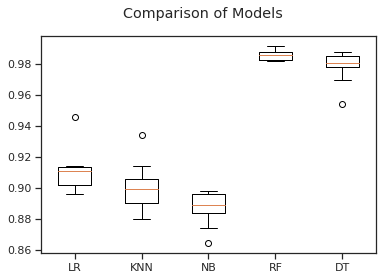

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10);
	cv_results = cross_val_score(model, data_X, data_Y, cv=kfold, scoring=scoring);
	results.append(cv_results);
	names.append(name);
	msg = "The Mean and Standard Deviation for the boxplot of %s is: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# Boxplot for algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison of Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **ROC & AUC for Classification Models**
Let's use ROC and AUC to evaluate the performance our models with False postive ratio/True positive ratio.

In [ ]:
#Perform Predictions for all the models
PRED_PROB_LOG_RAW=logmodel.predict_proba(X_test)
PRED_PROB_KNN_RAW=knn_model.predict_proba(X_test)
PRED_PROB_NB_RAW=nb_model.predict_proba(X_test)
PRED_PROB_RF_RAW=rfmodel.predict_proba(X_test)
PRED_PROB_DT_RAW=dtmodel.predict_proba(X_test)

In [ ]:
#calculate fpr,tpr,threshold
fpr1, tpr1, thresh1 = roc_curve(y_test, PRED_PROB_LOG_RAW[:,1], pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test, PRED_PROB_KNN_RAW[:,1], pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(y_test, PRED_PROB_NB_RAW[:,1], pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(y_test, PRED_PROB_RF_RAW[:,1], pos_label=1)
fpr5,tpr5,thresh5 = roc_curve(y_test, PRED_PROB_DT_RAW[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


AUC_LOG_RAW = roc_auc_score(y_test,PRED_PROB_LOG_RAW[:,1])
AUC_KNN_RAW=roc_auc_score(y_test,PRED_PROB_KNN_RAW[:,1])
AUC_NB_RAW=roc_auc_score(y_test,PRED_PROB_NB_RAW[:,1])
AUC_RF_RAW=roc_auc_score(y_test,PRED_PROB_RF_RAW[:,1])
AUC_DT_RAW=roc_auc_score(y_test,PRED_PROB_DT_RAW[:,1])

AUC_SCORES=pd.array([AUC_LOG_RAW, AUC_KNN_RAW, AUC_NB_RAW, AUC_RF_RAW, AUC_DT_RAW])

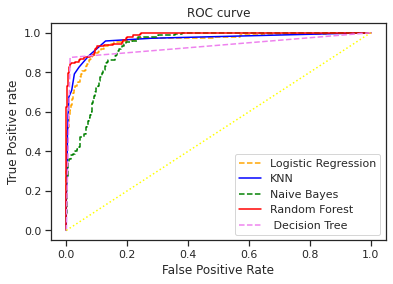

In [ ]:
#Plot Area Under Curve

plt.plot(fpr1,tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='solid',color='blue', label='KNN')
plt.plot(fpr3,tpr3,linestyle='--',color='Green', label='Naive Bayes')
plt.plot(fpr4,tpr4,linestyle='solid',color='Red', label='Random Forest')
plt.plot(fpr5,tpr5,linestyle='--',color='violet',label=' Decision Tree')


plt.plot(p_fpr, p_tpr, linestyle=':', color='Yellow')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

### **Final Observations:**

ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes

Higher the AUC, better the model is at distinguishing between a customer buying personal Loan and Not buying Personal Loan.

An excellent model has AUC near to the 1 which means it has good measure of separability, As you can see all our models both with raw data and upsampled data have AUC scores near to 1.

Now, The AUC score for Random Forest Classifier Model has the highest number, so does the ROC curve too.

By checking the Accuracy, Precision, Recall , ROC & AUC; Random Forest appears to be the best model for this classification problem. Hence, **Random Forest Classifier Model** can be chosen as our final model.

# **Final Conclusion for the Project:**


*   The given data was assessed using a thorough Exploratory Data Analysis.
*   For each of the features, Skewness and Outlier Analysis was performed. PowerTransformation was used for the necessary features. This helps increase the accuracy of the model.

*   Our target column had high imbalance which would result into a biased model. Upsampling technique was used to mitigate this issue.
*   Standardization was performed to increase the learning performance of the model.

*   A total of 5 models were tested on the main original data.
*   The **Random Forest Classifier** is the best Model for the data of this project. Decision Tree Classifier is also working fine, but there are chances of overfitting in that model, hence may not be recommnded.


# **THE END**

**Thank You**

________________________________________________________________________________